In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_quantitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

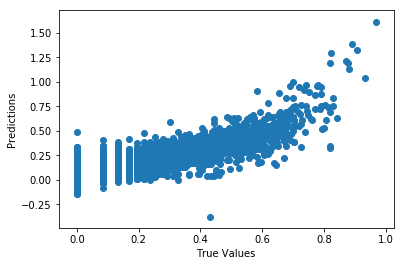

[  1.54479477e-04   3.96668491e-05  -3.35548536e-02   1.83190590e-01
  -1.20660932e+01   1.62584285e+00  -1.08672497e+02  -1.27350497e-03
   1.91125968e-04  -1.43064265e+00   9.58897757e-01   7.76014596e+01
  -2.67368843e+00  -3.82366026e-04   2.98535992e-04   1.45271226e-03
  -2.22819921e-04   4.20203801e-01  -2.16780367e-01  -3.90900940e-02
   3.42908384e-01  -4.00813646e+01   1.57492391e+00  -2.12293760e+00
  -2.45711387e-02   4.24916200e+02  -2.24611437e+02   4.31104112e-07
   5.52667360e-03  -1.62366774e-05   1.20057906e-03  -1.60188480e-05
   8.46546344e-05  -1.57901318e-05   5.59567834e-05]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.68626978  0.70520776  0.69406439  0.61687095]


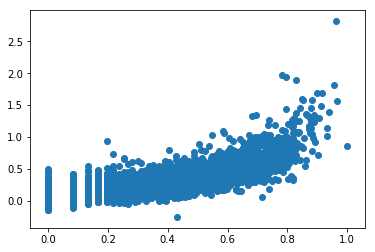

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.687116055479


In [9]:
print(lm.coef_)

[  1.54479477e-04   3.96668491e-05  -3.35548536e-02   1.83190590e-01
  -1.20660932e+01   1.62584285e+00  -1.08672497e+02  -1.27350497e-03
   1.91125968e-04  -1.43064265e+00   9.58897757e-01   7.76014596e+01
  -2.67368843e+00  -3.82366026e-04   2.98535992e-04   1.45271226e-03
  -2.22819921e-04   4.20203801e-01  -2.16780367e-01  -3.90900940e-02
   3.42908384e-01  -4.00813646e+01   1.57492391e+00  -2.12293760e+00
  -2.45711387e-02   4.24916200e+02  -2.24611437e+02   4.31104112e-07
   5.52667360e-03  -1.62366774e-05   1.20057906e-03  -1.60188480e-05
   8.46546344e-05  -1.57901318e-05   5.59567834e-05]
